## Процесс решения задачи

Решение почти любой DS задачи в продуктовой аналитике можно разбить на следующие этапы:
1) Проанализировать задачу, понять к какому виду и классу обучения она относится. Вместе с бизнесом выбрать метрику

2) EDA (exploratory data analysis) - процесс когда мы изучаем качество данных, признаки, их распределение и связь с целевой(целевыми переменными)

3) Предобработка данных (обработка пропусков, кодирование/создание новых признаков, очистка данных от выбросов и т.д.)

4) Обучение и оптимизация моделей

5) Валидация результатов

## Задание

Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:
1) провести исследовательский анализ данных,
2) визуализировать результаты и сделать из них выводы,
3) провести предобработку признаков (возможно создать новые),
4) обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,
5) оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,
6) проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).


## Данные

В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM. https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/
Описание данных:
* Customer - идентификатор пользователя
* State - штат
* Customer Lifetime Value - LTV пользователя
* Response - взаимодействие с рекламой
* Coverage - тип страхового покрытия
* Education - образование
* Effective to date - срок действия страховки
* EmploymentStatus - трудоустройство
* Gender - пол
* Income - доход
* Location code - тип местности в которой проживает пользователь
* Marital Status - семейное положение
* Monthly Premium Auto
* Months Since Last Claim - месяцев с последнего требования по выплате компенсации
* Months Since Policy Inception - месяцев с открытия страховки
* Number of Open Complaints - количество незакрытых жалоб
* Number of Policies - количество полисов
* Policy Type - тип страховки
* Policy - страховка
* Renew Offer Type - обновленный тип предложения
* Sales Channel - канал продаж
* Total Claim Amount - сумма выплаченных компенсаций
* Vehicle Class - класс автомобиля
* Vehicle Size - размер автомобиля

In [1]:
#!pip freeze requiements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('LTV.csv')

train_data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
154,YM50253,California,2946.153697,No,Basic,Bachelor,2/1/11,Employed,F,89270,...,90,0,1,Personal Auto,Personal L3,Offer2,Branch,316.599228,Four-Door Car,Medsize
2069,VI78454,Arizona,2750.705045,No,Basic,College,1/22/11,Employed,M,51789,...,34,0,1,Personal Auto,Personal L2,Offer4,Call Center,336.000000,Four-Door Car,Large
7105,AU23837,Oregon,5010.379310,No,Basic,Bachelor,1/19/11,Employed,F,64014,...,27,0,7,Corporate Auto,Corporate L3,Offer1,Agent,295.871784,Four-Door Car,Large
5862,MP95255,California,3919.366722,Yes,Extended,High School or Below,1/5/11,Employed,F,66676,...,40,0,1,Personal Auto,Personal L1,Offer3,Agent,558.099357,Four-Door Car,Small
4961,JG66653,Oregon,2537.929538,No,Basic,High School or Below,1/22/11,Employed,M,25506,...,16,0,1,Personal Auto,Personal L3,Offer3,Branch,312.000000,Two-Door Car,Medsize
2528,PG26401,Washington,9191.672825,No,Basic,High School or Below,1/24/11,Employed,M,77603,...,83,0,8,Personal Auto,Personal L1,Offer2,Call Center,547.200000,SUV,Medsize
5891,QH51455,Arizona,4004.551300,No,Premium,College,1/20/11,Unemployed,M,0,...,65,0,1,Personal Auto,Personal L3,Offer2,Agent,513.600000,Four-Door Car,Medsize
4213,KX57885,California,6073.241952,No,Extended,Bachelor,2/26/11,Retired,M,22103,...,74,1,3,Personal Auto,Personal L3,Offer2,Call Center,427.200000,Four-Door Car,Medsize
6788,WI47826,Oregon,4935.642812,No,Basic,College,2/17/11,Employed,F,95765,...,80,0,3,Personal Auto,Personal L3,Offer1,Branch,352.089317,Four-Door Car,Medsize
7483,RC16862,Arizona,2433.089468,No,Basic,College,1/19/11,Unemployed,M,0,...,79,0,1,Corporate Auto,Corporate L3,Offer1,Agent,493.055291,Four-Door Car,Medsize


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
train_data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [5]:
X_all = train_data.drop('Customer Lifetime Value', axis = 1)
y_all = train_data['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X_all, y_all, random_state = 42, test_size = .2)

## Выделим численные признаки от остальных

In [7]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)

from pprint import pprint        
pprint(num_cols)

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']


In [8]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [9]:
train_data[num_cols].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Построим графики, посмотрим на распределение признаков

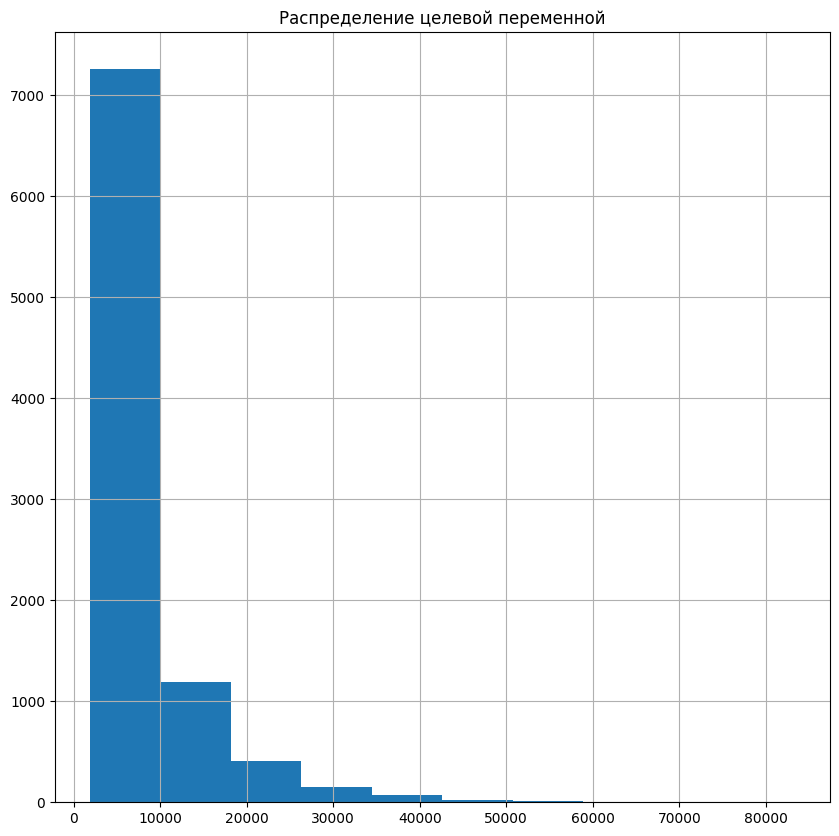

In [10]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

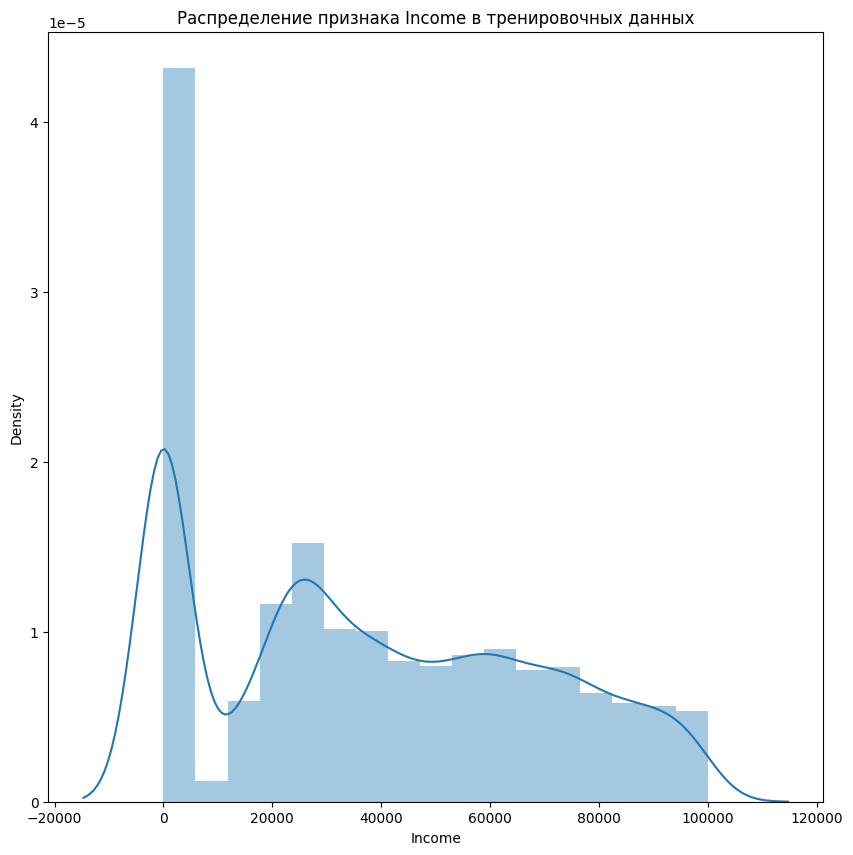

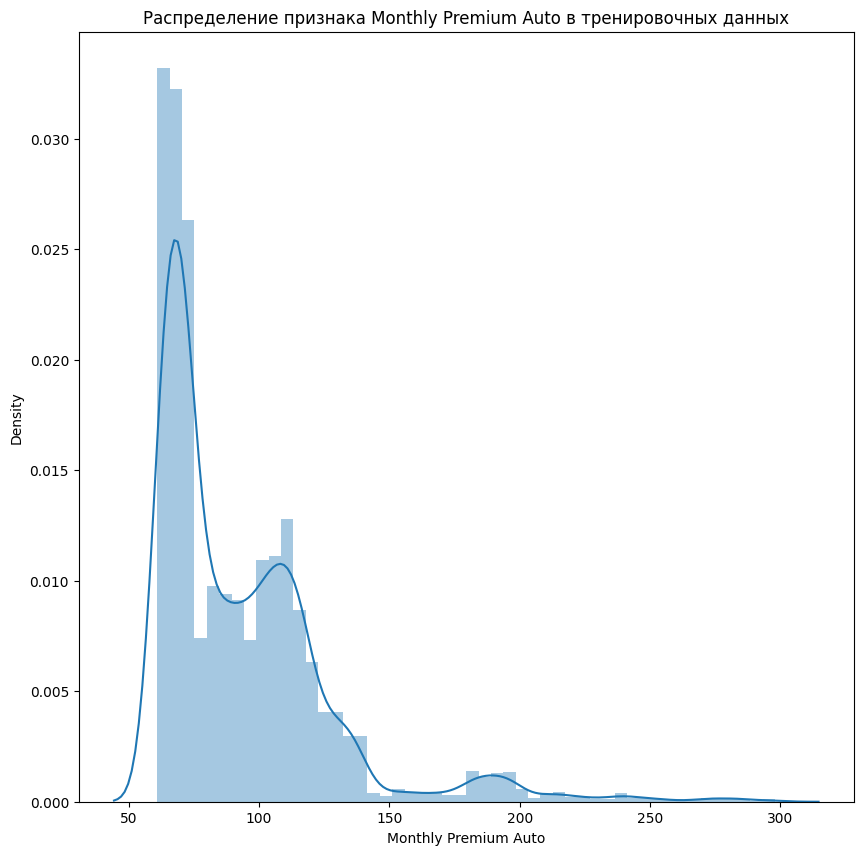

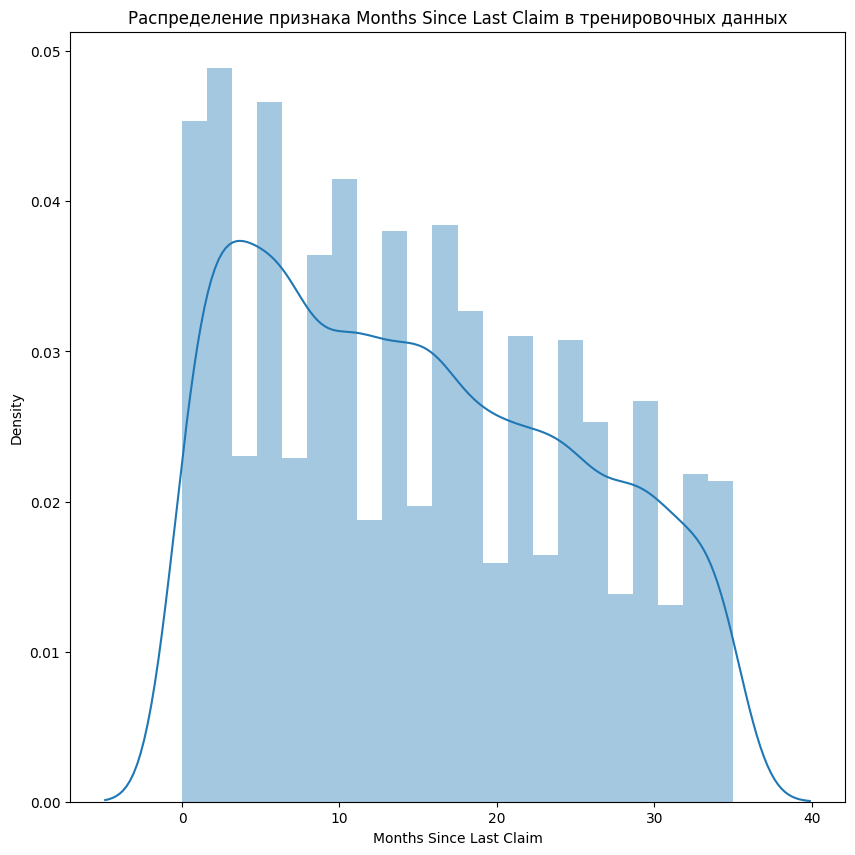

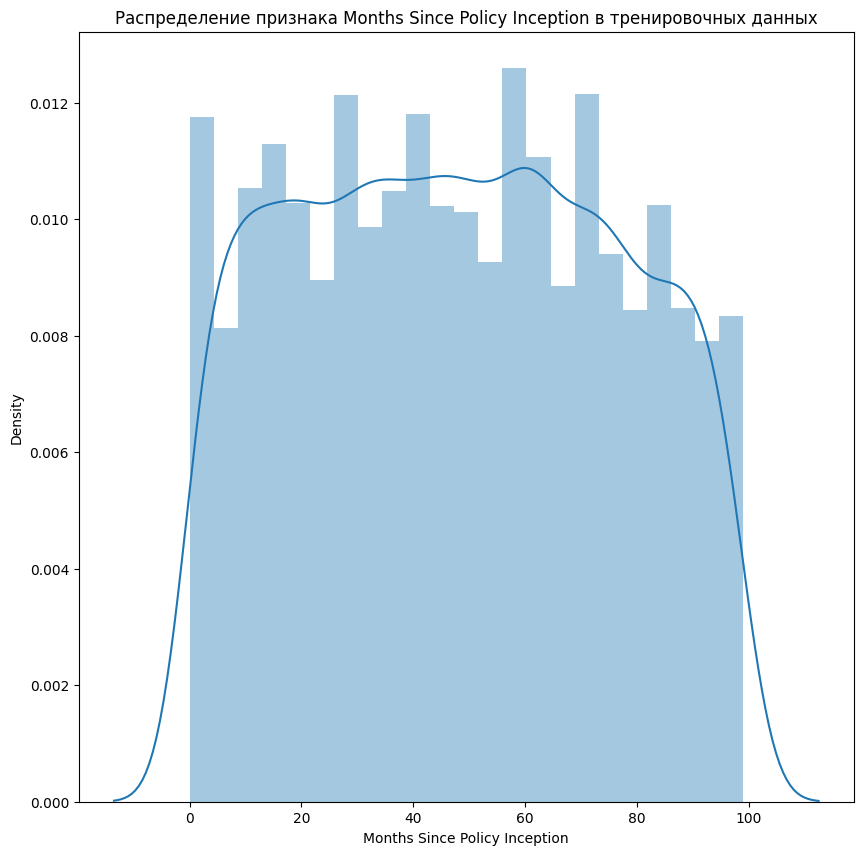

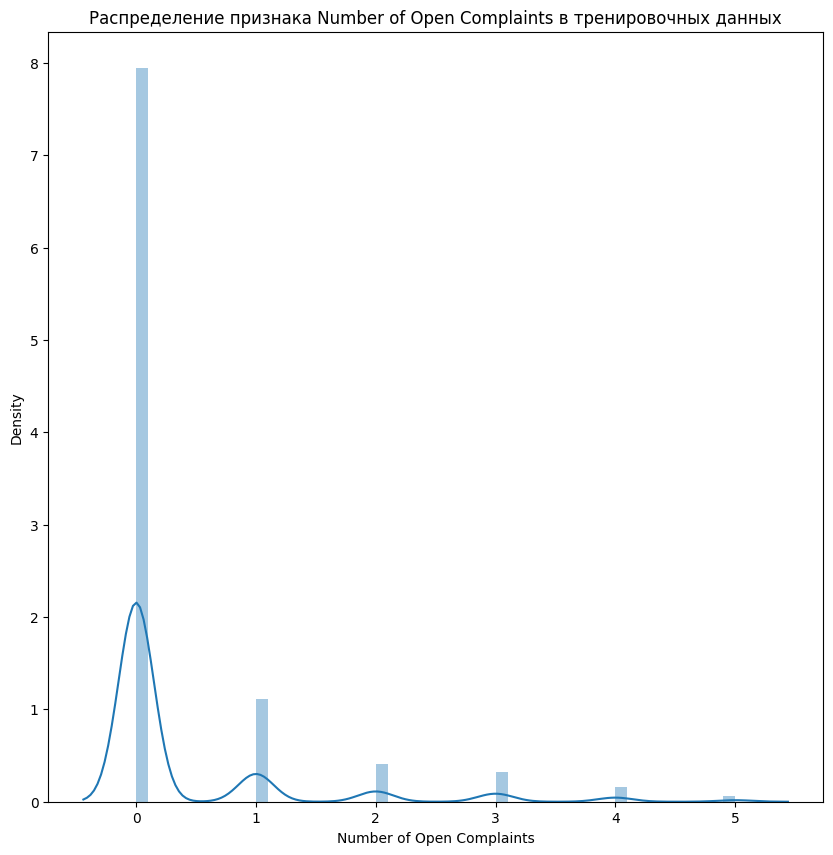

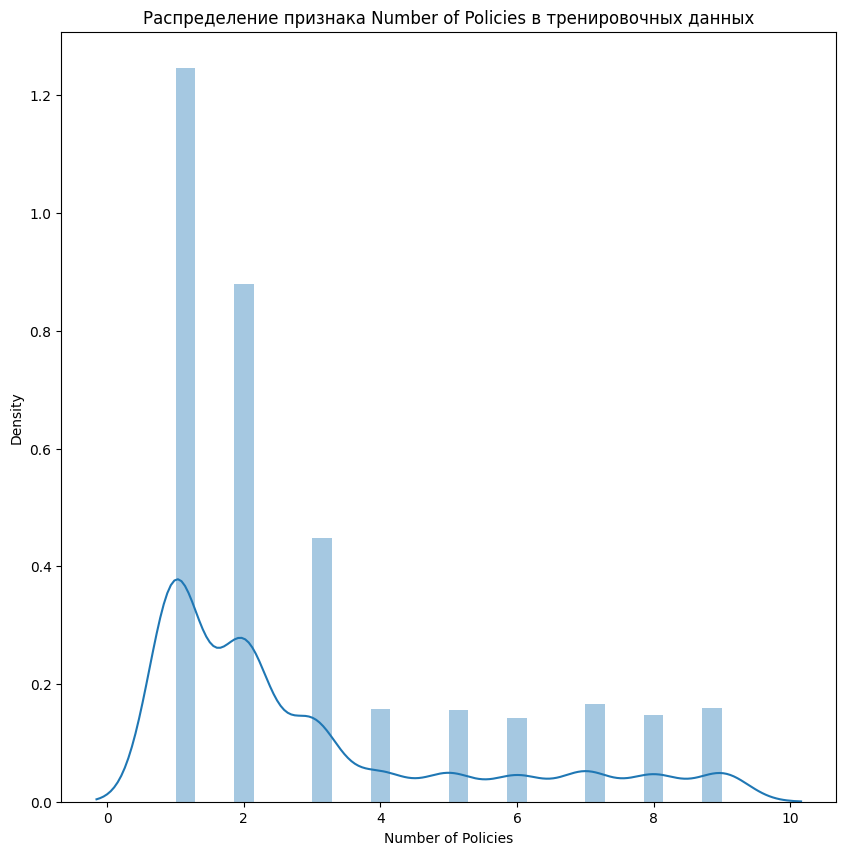

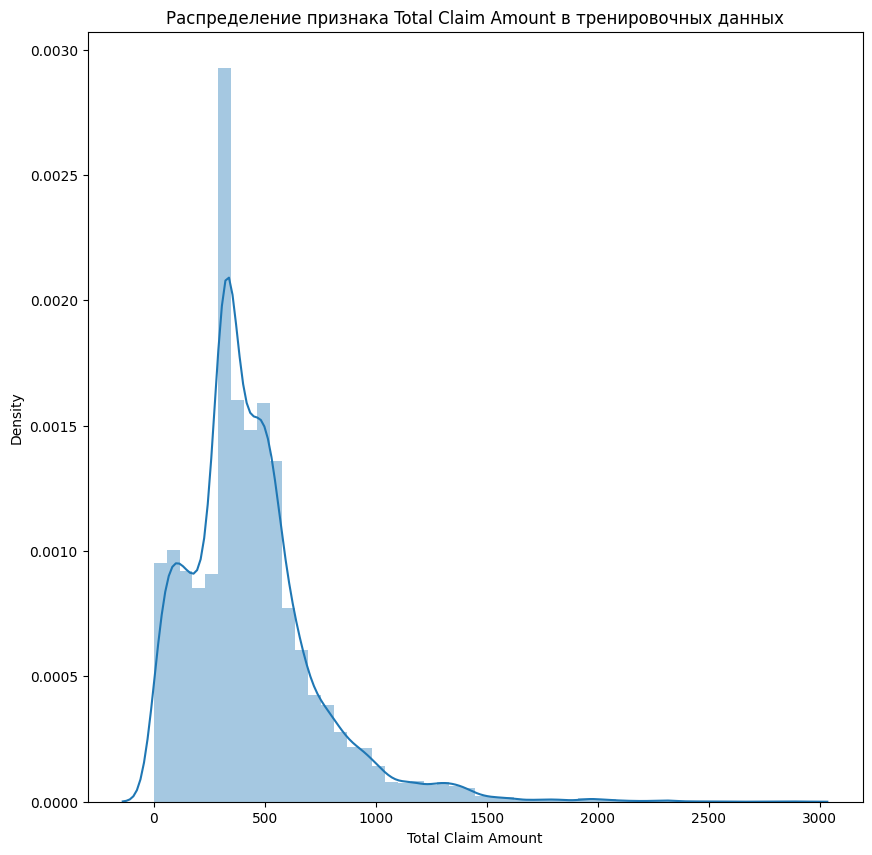

In [11]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

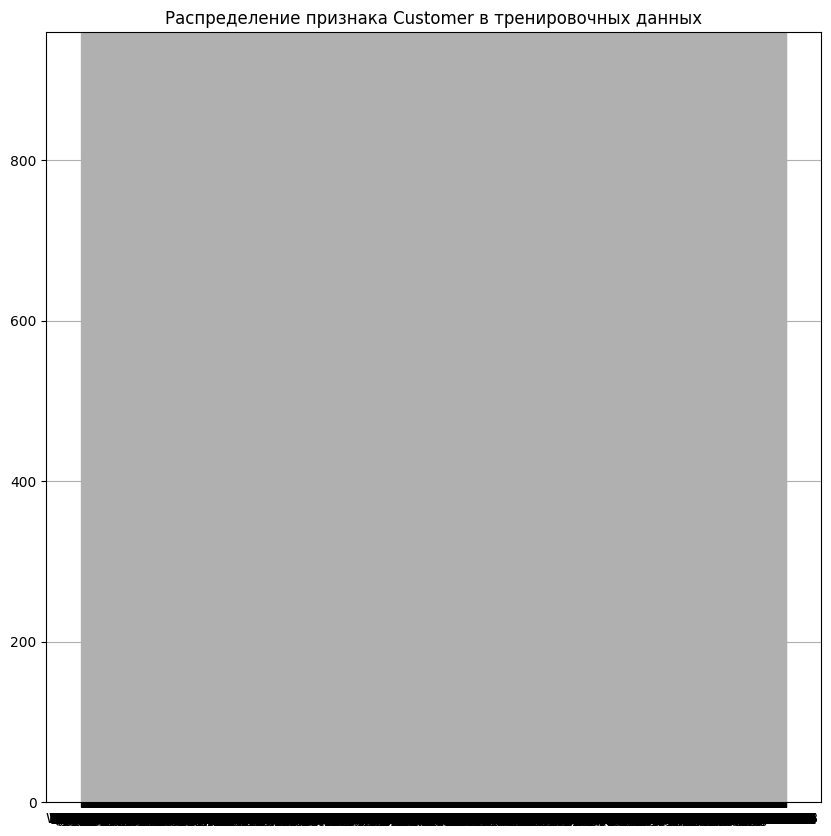

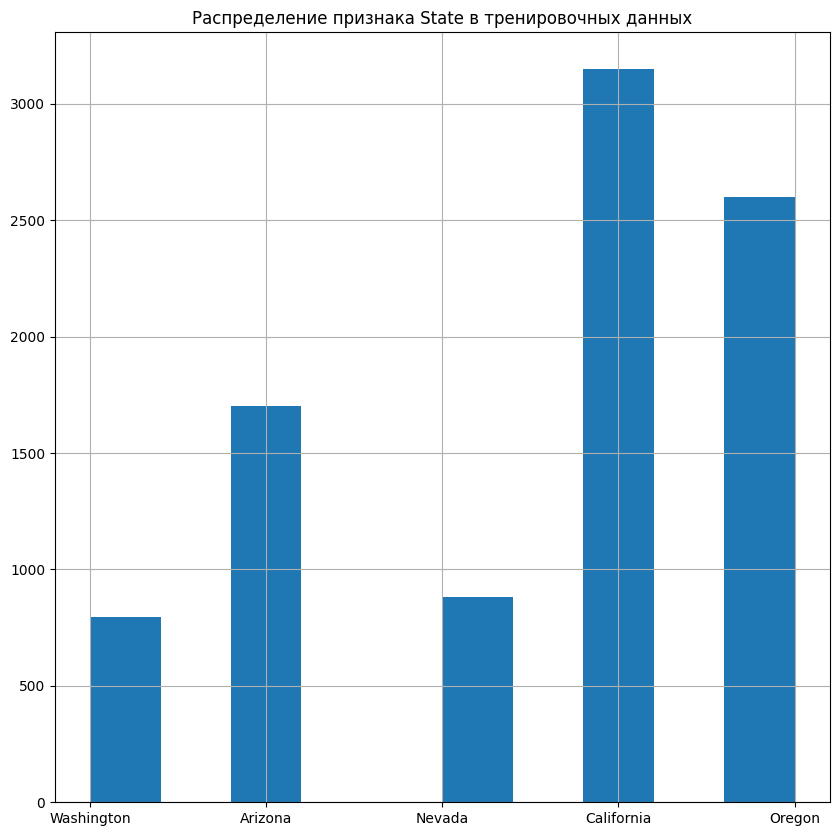

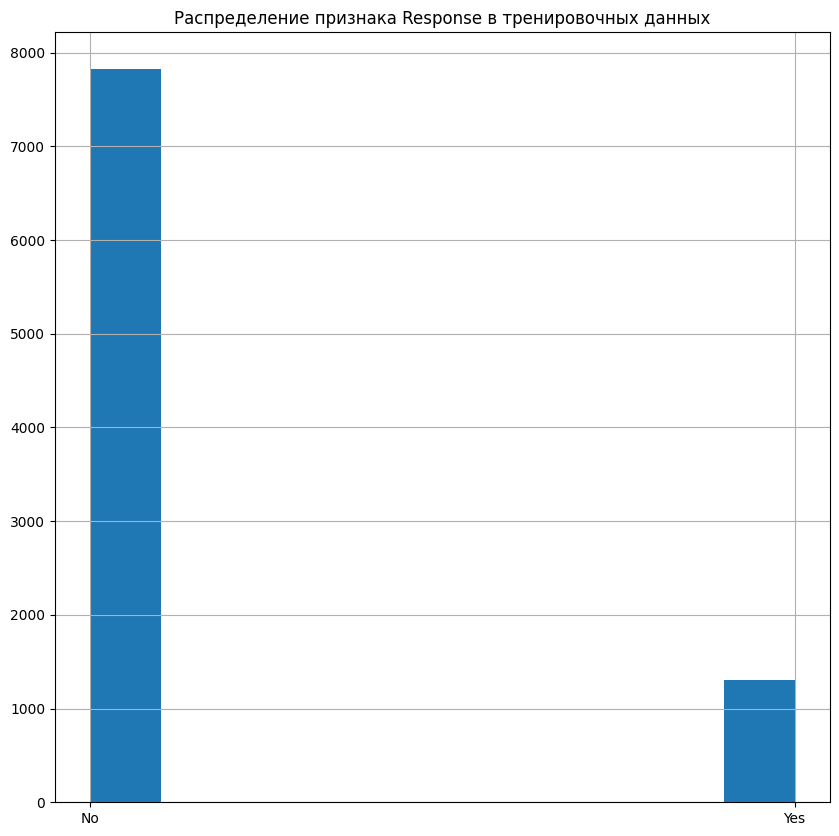

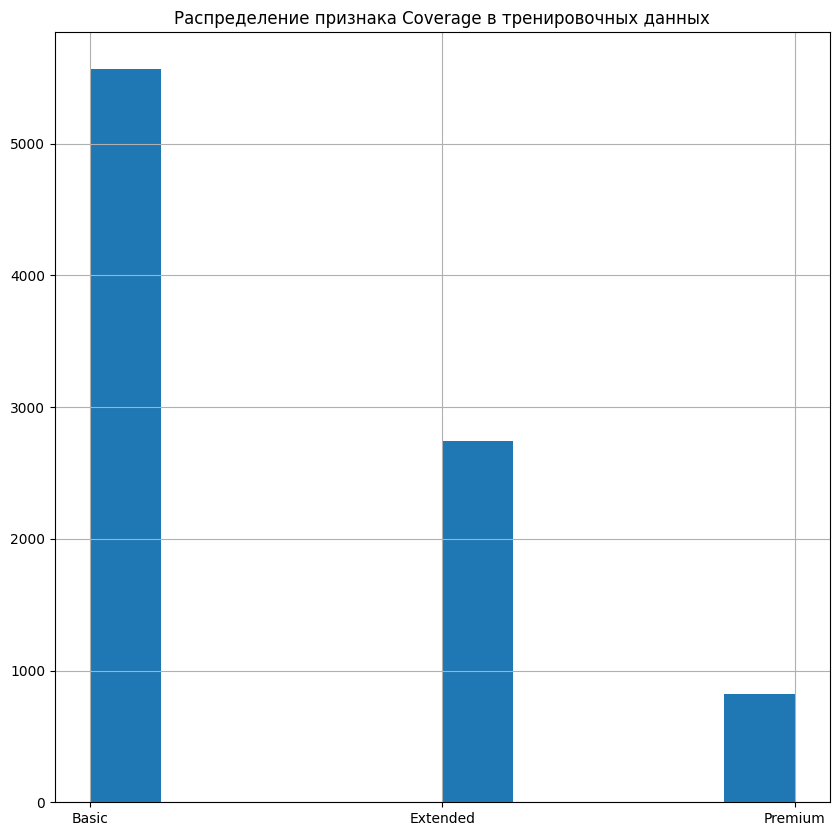

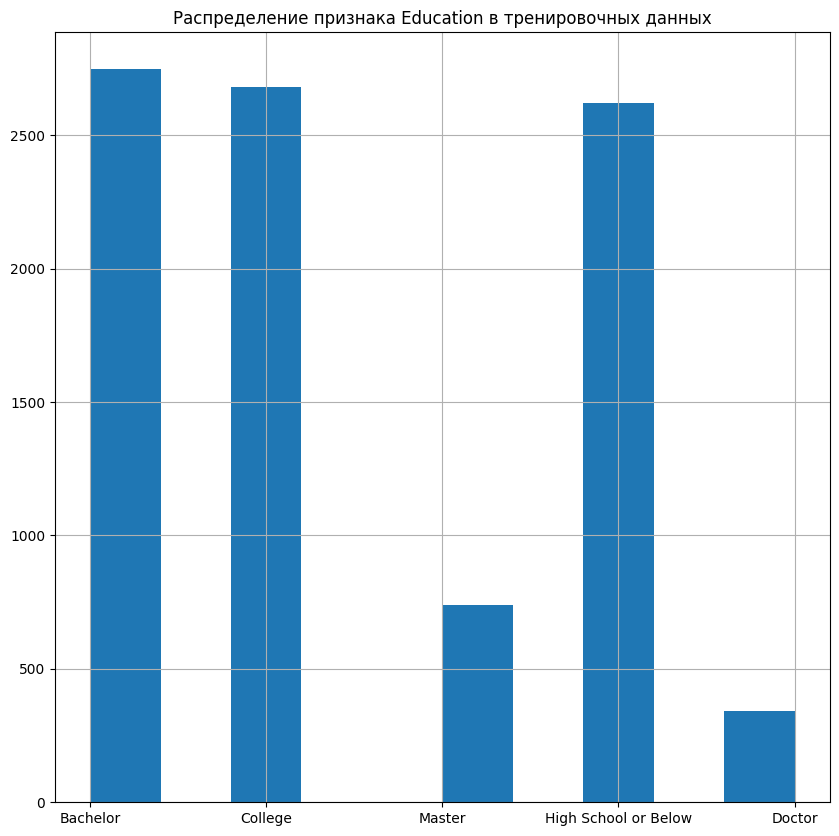

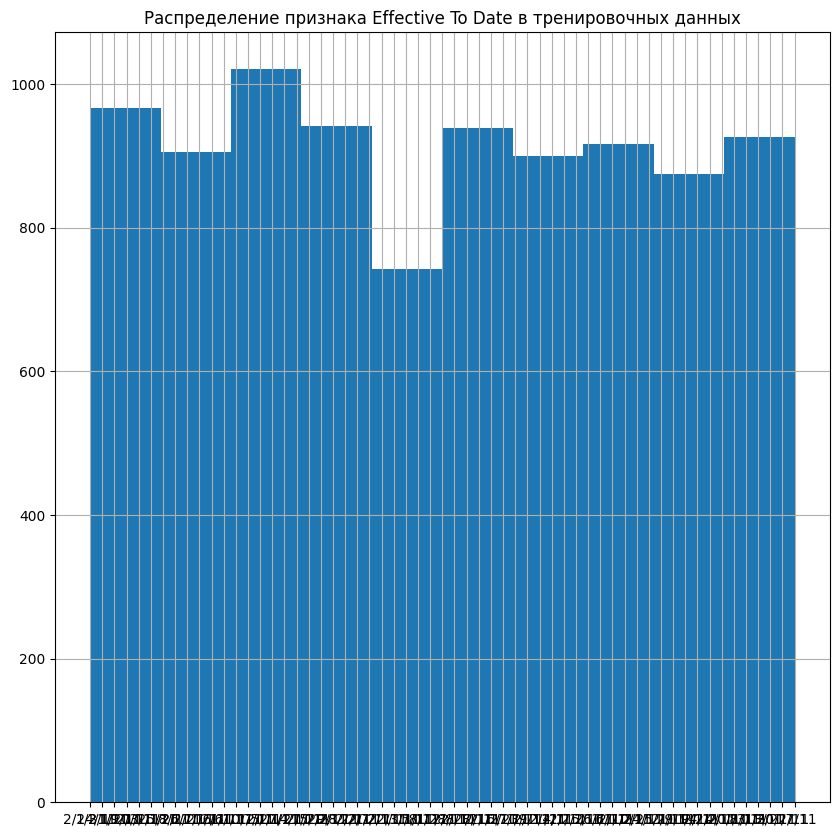

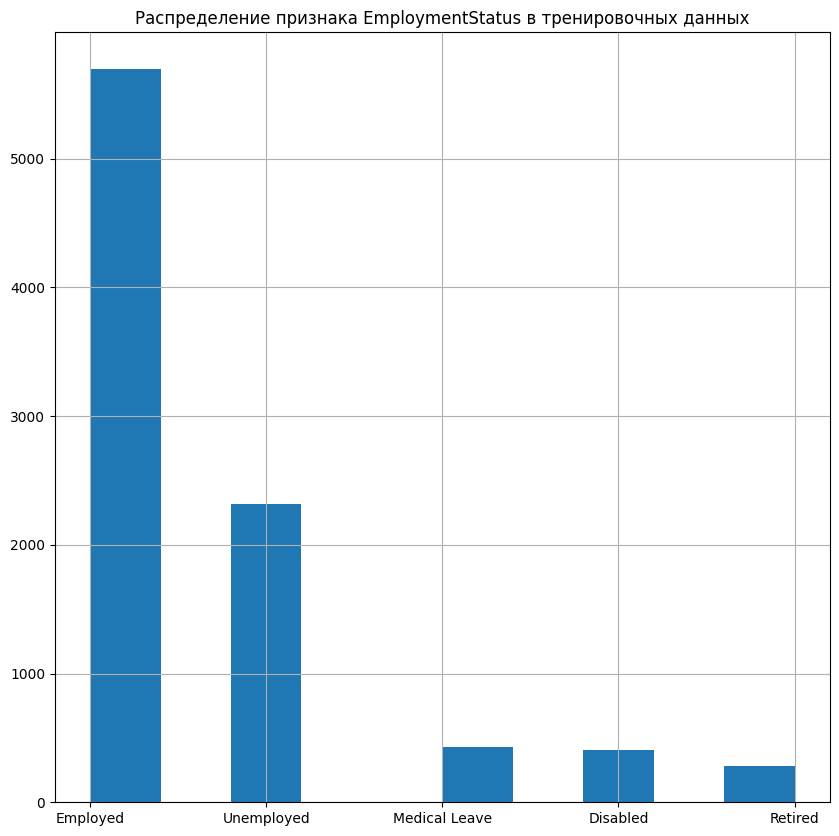

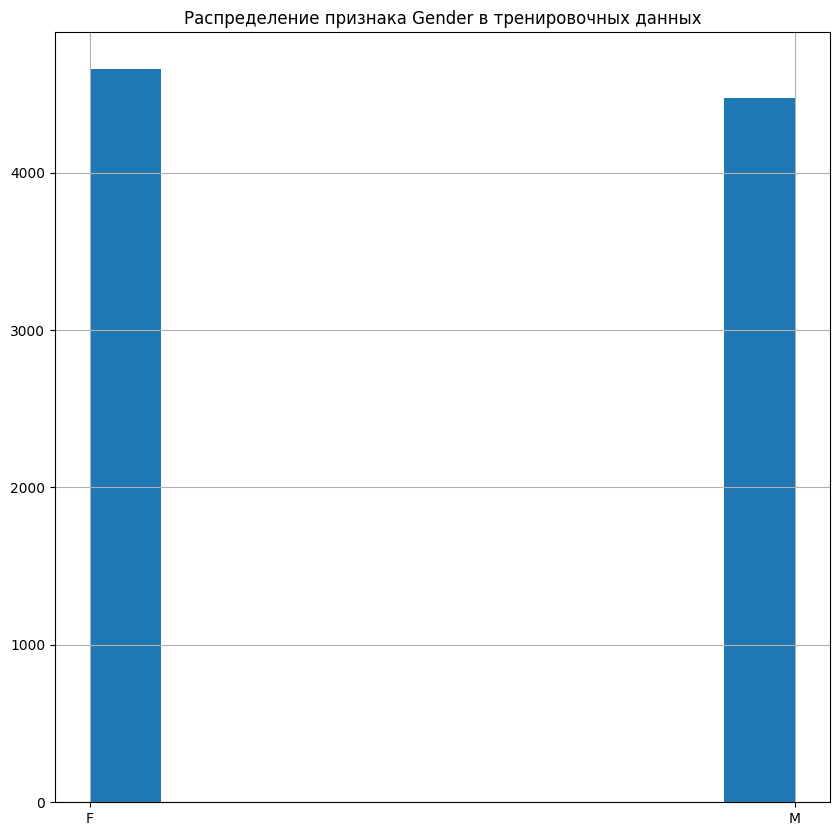

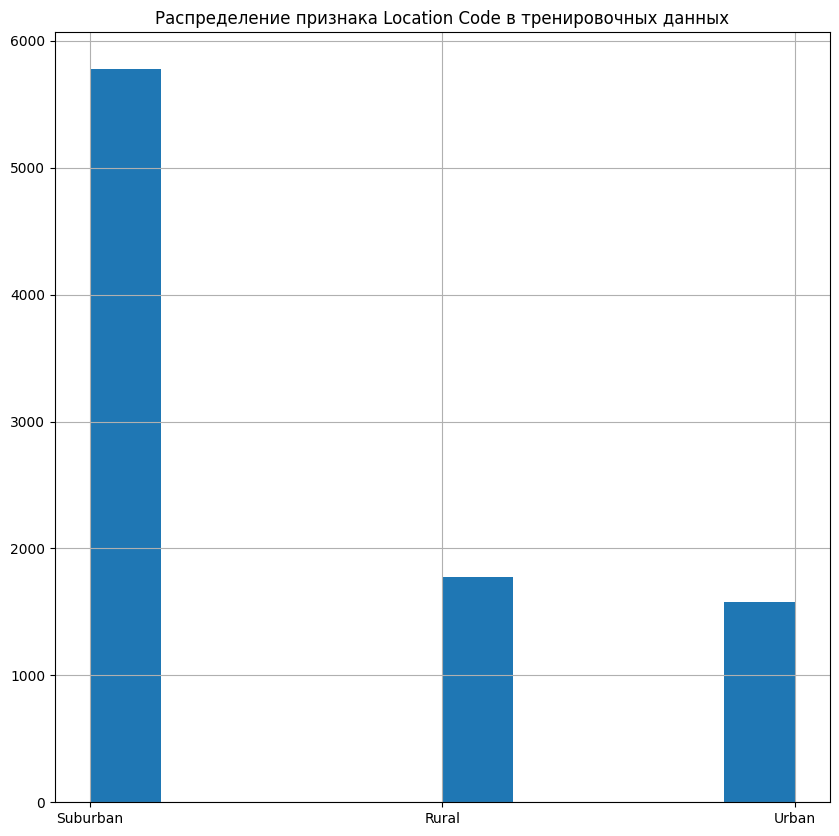

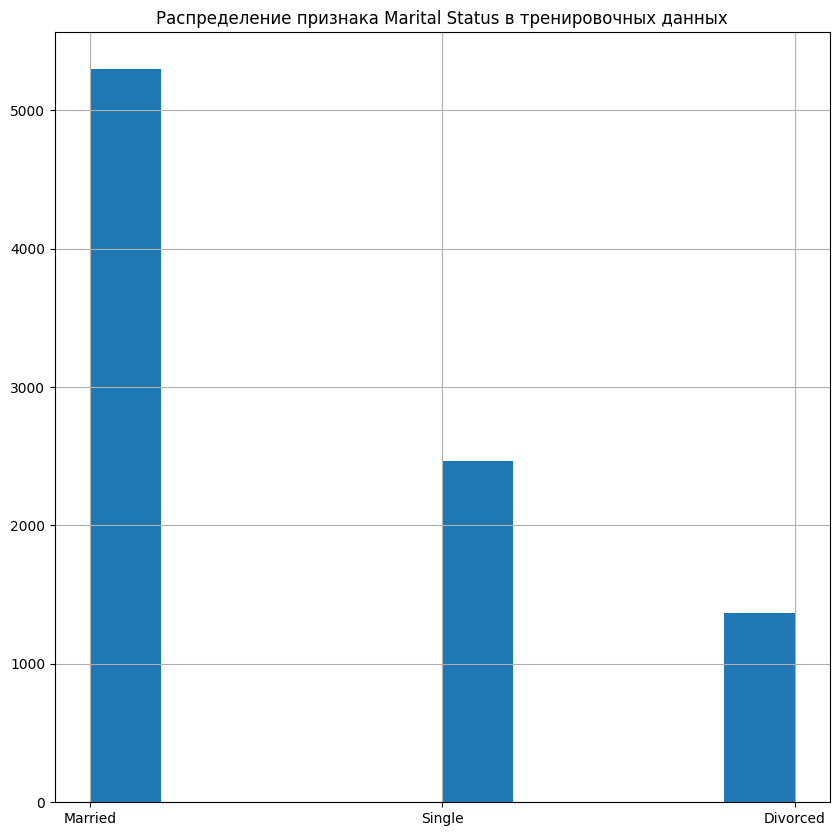

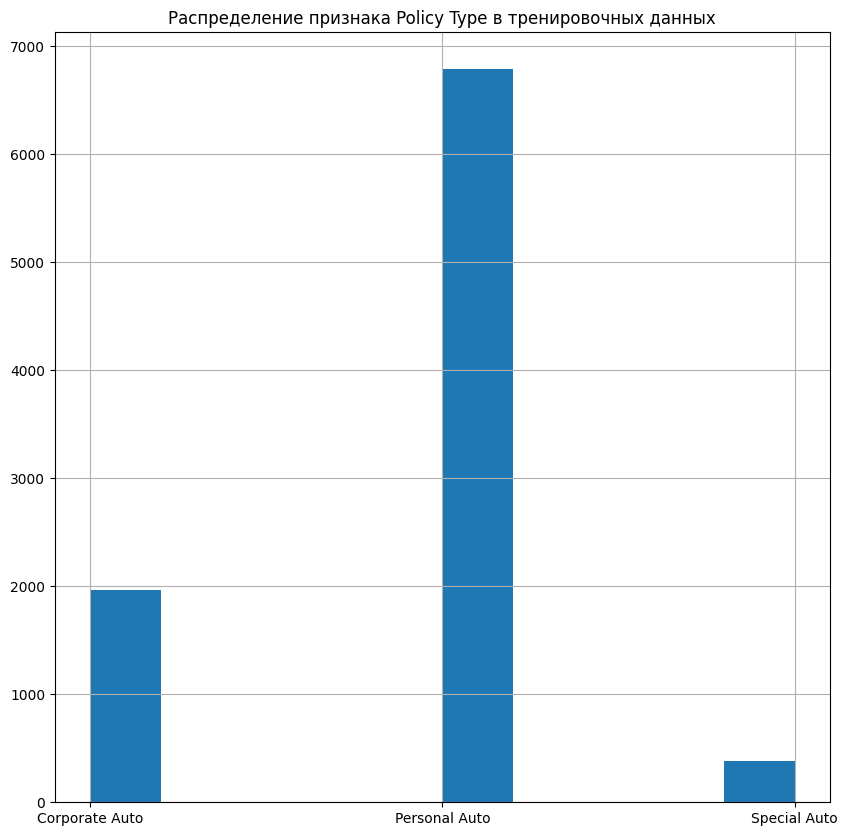

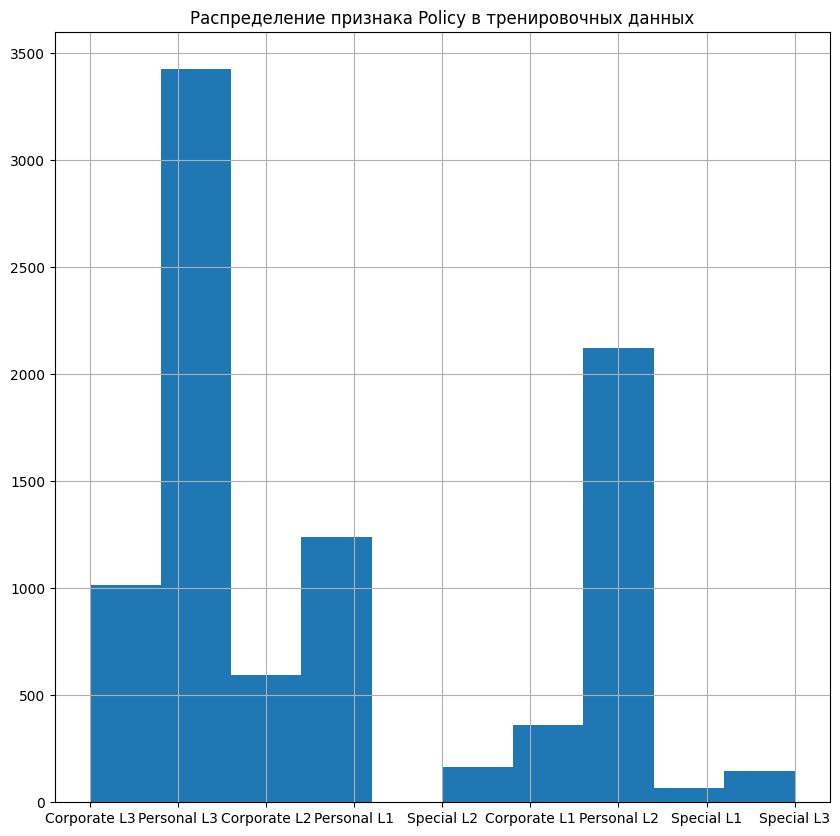

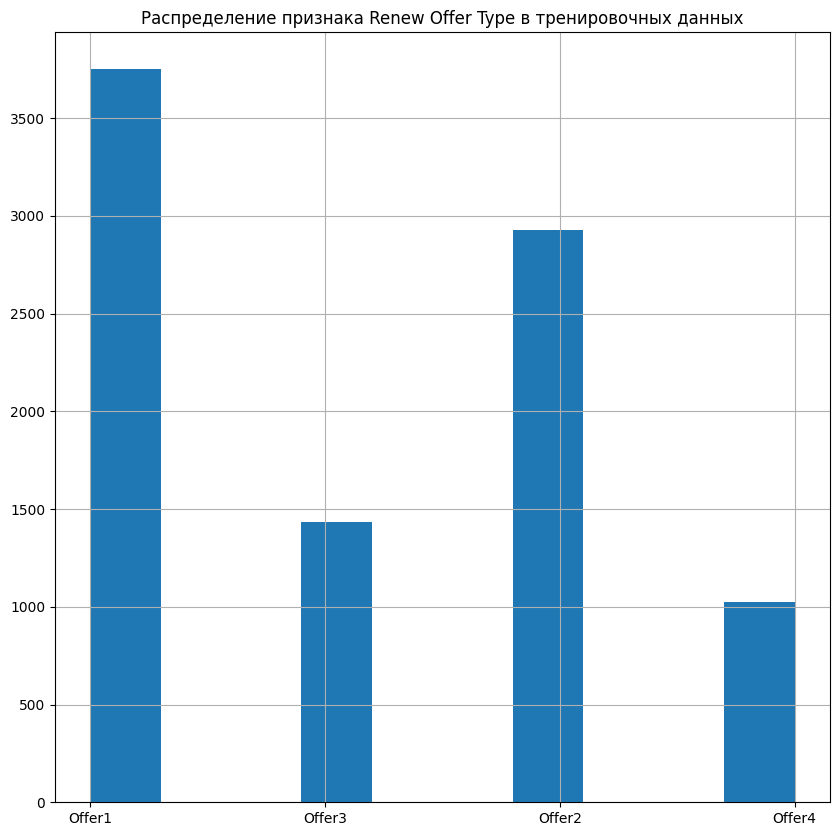

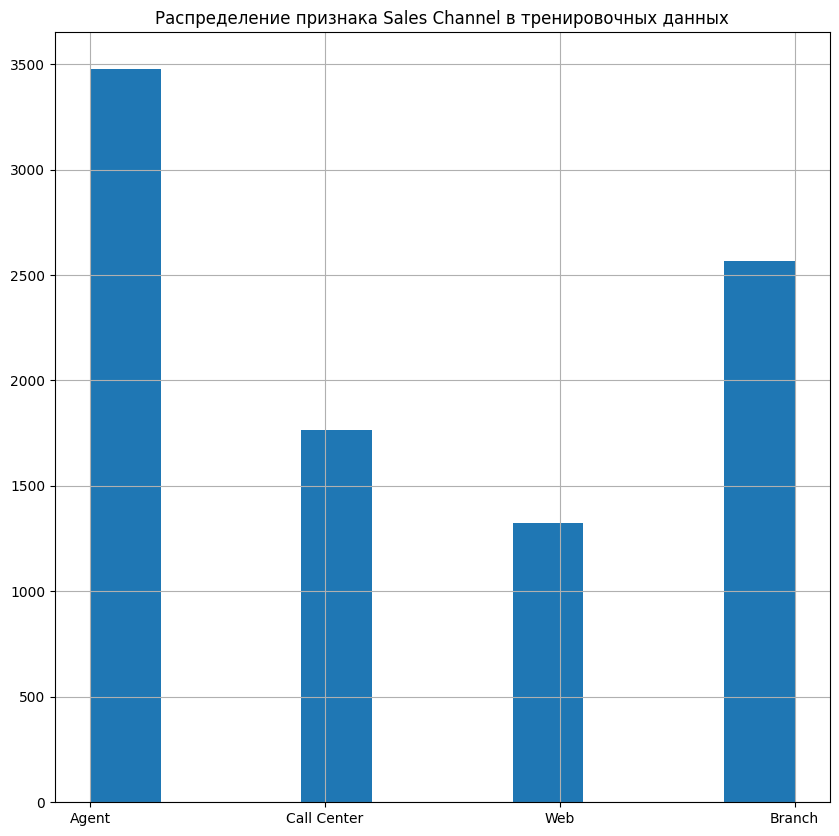

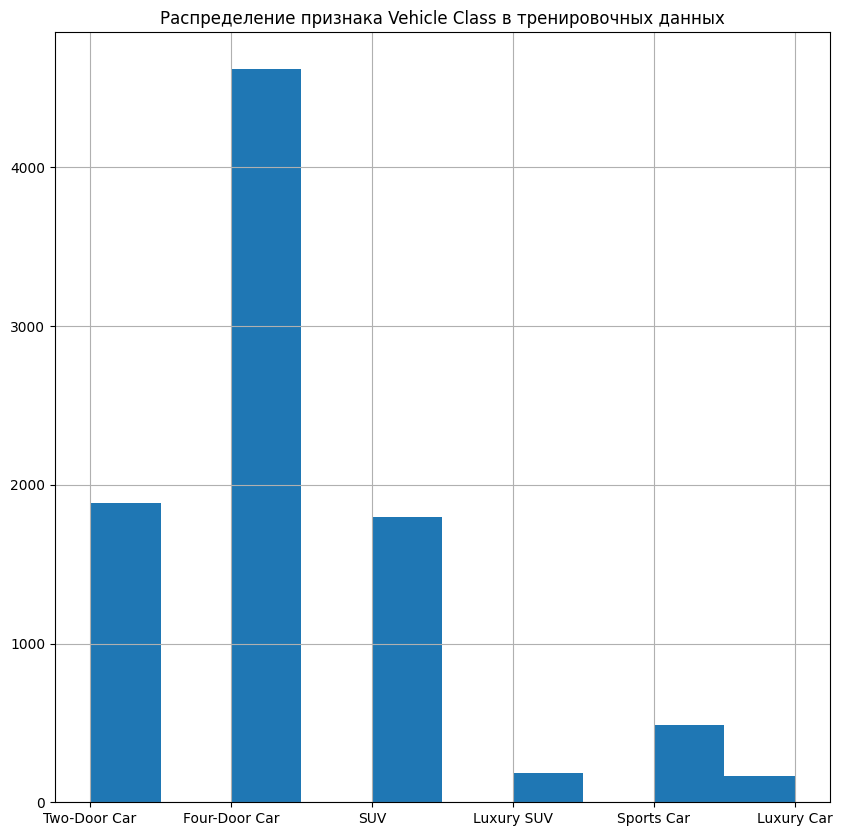

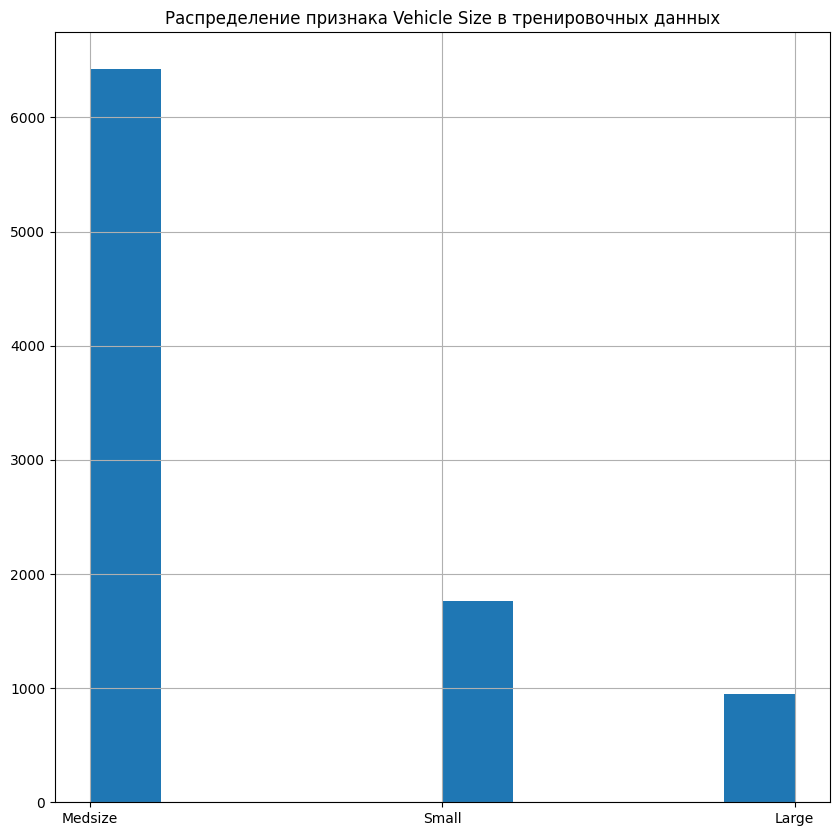

In [12]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

## Предобработка признаков

**Важно** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

In [13]:
#test_data = pd.read_csv('LTV.csv')
#print(test_data.shape)

In [17]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])
    X_test[col] = le.fit_transform(X_test[col])
    #X[col] = le.transform(X[col])
    #X_test[col] = le.transform(X_test[col])
    

X.sample(10)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
1080,1774,4,0,0,3,45,4,0,0,1,...,7,0,1,1,5,1,0,468.000000,0,1
2733,6735,1,0,0,3,35,4,0,0,1,...,38,0,1,0,2,3,2,763.200000,3,2
1166,1654,0,0,0,0,45,1,1,50405,0,...,21,1,9,1,4,2,2,7.069583,0,1
7507,6911,3,0,0,1,29,1,1,96689,0,...,80,0,5,1,4,0,0,37.802583,4,1
5066,2220,0,0,0,3,25,0,1,22158,1,...,92,0,1,1,3,1,2,355.200000,0,2
2747,6359,1,0,0,1,54,2,1,26991,1,...,65,0,1,0,2,2,1,856.800000,3,1
4647,3900,2,0,2,0,32,1,0,85478,0,...,15,0,6,1,3,0,2,224.159416,5,1
5747,2640,1,0,1,3,29,1,1,98333,2,...,69,1,1,1,5,0,1,459.048775,0,1
1110,1059,1,0,1,1,47,1,0,43137,1,...,41,0,8,1,5,1,2,460.800000,5,0
8523,3678,1,0,0,0,16,1,1,59292,2,...,92,0,4,0,2,1,2,218.491318,5,1


In [19]:
y = le.fit_transform(y)
y_test = le.fit_transform(y_test)
y[:10]

array([2136,  852,  970, 2553,  537, 4913, 5405, 4110, 2679, 2820],
      dtype=int64)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)


## Корреляция признаков

Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин **(с) Википедия**


**Корреляция** - величина показывающая связь двух и более величин. Существуют различные виды корреляций, мы не будем останавливаться на этом, для желающих разобраться ссылки на материалы в конце урока

**Корреляционная матрица** - квадратная матрица, элементы которой представляют собой корреляцию величин
В библиотеке `pandas.DataFrame` есть атрибут `corr()`, который считает корреляционную матрицу

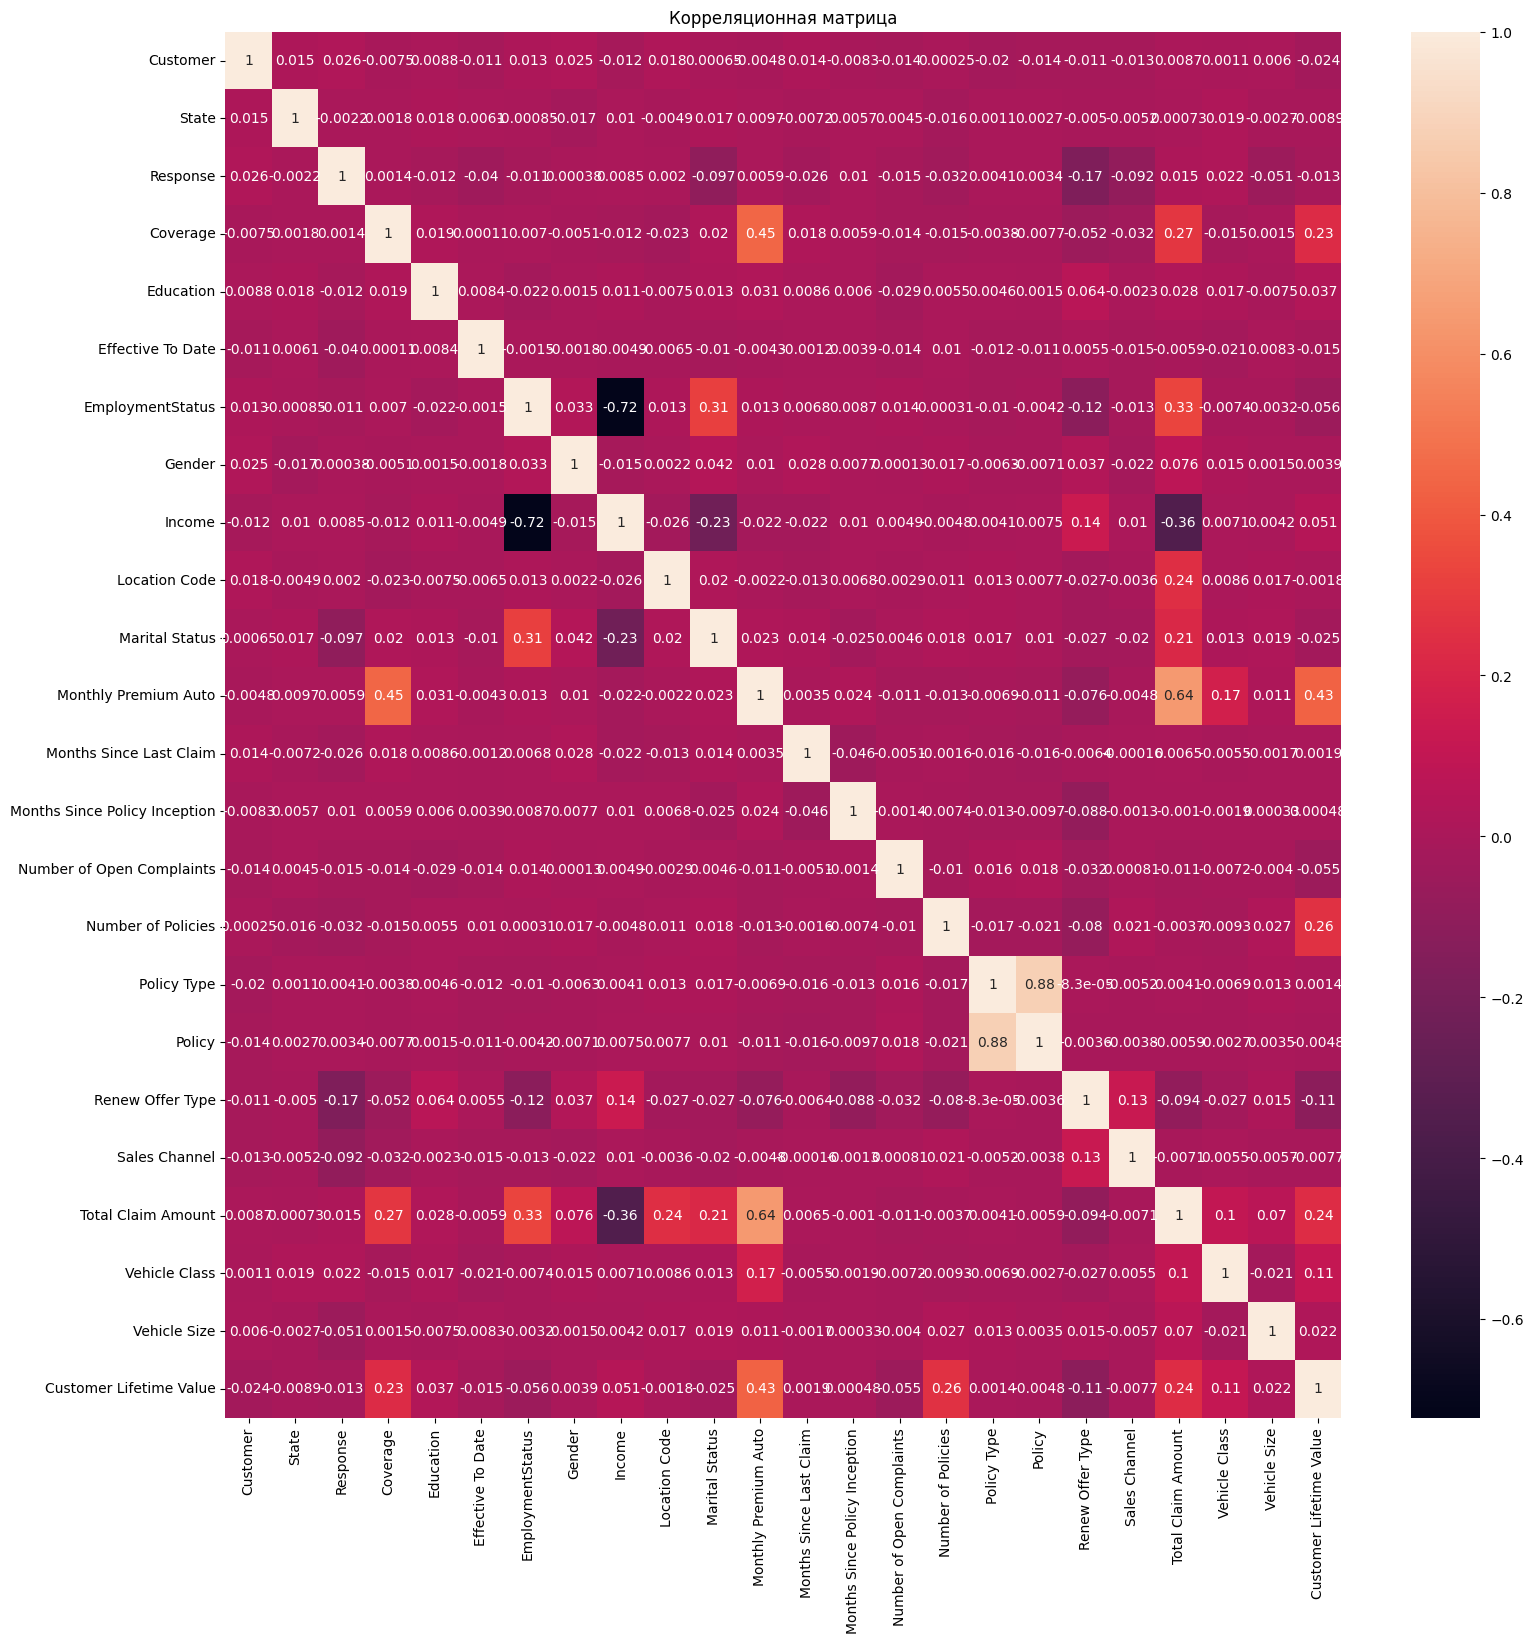

In [22]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Customer Lifetime Value'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()



# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

## Обучение различных моделей

Будем сравнивать между собой 3 модели: Логистическую регрессию, классификатор на решающем дереве, и случайный лес

In [23]:
# Кросс-валидация
from sklearn.model_selection import cross_validate

In [17]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500)

cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))

Результаты Логистической регрессии: nan


In [18]:
# метод логистической регрессии не нашел связь
cv_log_reg

{'fit_time': array([62.3784554 , 50.70370245, 49.88030577, 51.90644217, 48.75554347]),
 'score_time': array([0.22754383, 0.13660812, 0.14179373, 0.13900208, 0.13559222]),
 'test_score': array([nan, nan, nan, nan, nan])}

In [24]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier


dec_tree = DecisionTreeClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

Результаты решающего дерева: nan


In [25]:
cv_dec_tree

{'fit_time': array([12.65639043, 13.09101343, 14.72565484, 16.5597527 , 19.82010484]),
 'score_time': array([0.1235559 , 0.06400347, 0.07399726, 0.14700389, 0.08800697]),
 'test_score': array([nan, nan, nan, nan, nan])}

In [21]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier


ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_ran_for = cross_validate(ran_for, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

Результаты решающего дерева: nan


In [22]:
cv_ran_for

{'fit_time': array([306.3572135 , 298.08957529, 304.40856481, 291.7456069 ,
        288.72904944]),
 'score_time': array([10.14444757,  8.9432323 ,  8.83628988,  8.98218918,  8.68947864]),
 'test_score': array([nan, nan, nan, nan, nan])}

## Интерпретация модели и важность признаков

Для того чтобы понять что заставляет пользователей уходить и оставаться, нужно понять влияние признаков. При работе с логистической регрессией можно использовать атрибут `coef_`

**Важно** атрибут `coef_` работает только когда метод `fit()` был явно вызван

In [23]:
log_reg.fit(X, y)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

Коэффициенты в линейной регрессии: [[ 2.71104177e-03 -3.96120890e-06 -3.95898338e-07 ... -9.20113973e-04
   9.75594234e-06 -1.10617645e-06]
 [ 1.71351384e-03 -6.47751016e-07 -3.92605531e-08 ...  2.28365217e-03
   1.70369900e-05  6.69310093e-06]
 [ 2.85608867e-03 -4.89551579e-06 -4.51025732e-07 ... -1.53659063e-03
  -8.91834337e-06 -1.67270726e-06]
 ...
 [-3.71504507e-03 -1.21206170e-06 -4.07182416e-07 ...  2.22583140e-03
   1.63169585e-06  4.80714189e-07]
 [ 2.45659025e-03  4.08432002e-06 -4.67093175e-07 ...  2.17308385e-03
  -7.85920450e-06 -2.78057094e-06]
 [-2.40358327e-03  3.86668432e-06 -5.61734745e-07 ...  2.25901414e-03
  -4.12627300e-06  2.74962928e-06]]


При работе с одним решающем дереве интерпретировать результаты достаточно просто, для этого есть атрибут `feature_importances_` Он показывает долю важности признака на целевую переменную

**Важно** атрибут `feature_importances_` работает только когда метод `fit()` был явно вызван

In [24]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.05781687 0.04303414 0.00057862 0.02912744 0.04984822 0.07023812
 0.02573289 0.02764916 0.06044824 0.03120797 0.02890843 0.07117743
 0.07322017 0.06829252 0.02244784 0.04872823 0.02343335 0.0466477
 0.03934394 0.0397491  0.07348055 0.03089201 0.03799707]


Некоторые типы моделей (например экстримально случайный лес и все что основано на бустинге) интерпретировать стандартными способами практически невозможно. 

Для интерпретации таких моделей можно использовать библиотеку `shap`, которая работает на основе ядра и вектора Шэпли - важнейших понятий в коалиционной теории игр

In [26]:
# Раскомментируйте чтобы установить 
#!pip install shap

In [26]:
import shap
# Загружаем JS шаблоны для визуализации
shap.initjs()

# Обязателен явный вызов метода fit
ran_for.fit(X, y)

print("Обучили модель, переходим к визуализации")
# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

Обучили модель, переходим к визуализации


MemoryError: Unable to allocate 635. MiB for an array with shape (10345, 8041) and data type float64

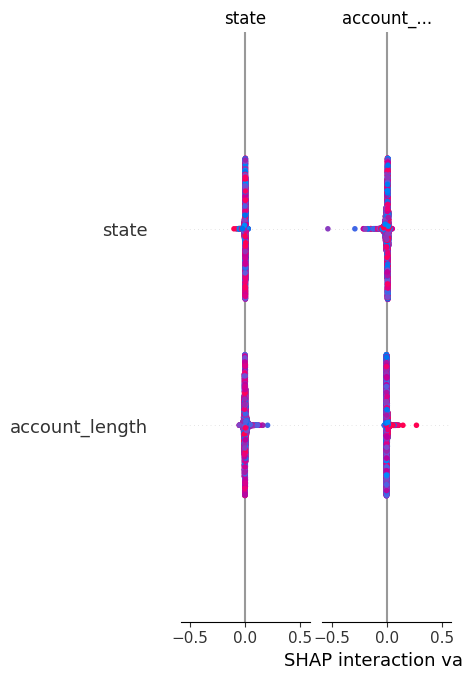

In [28]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")